تحميل المكتبات

In [2]:
import pandas as pd
import numpy as np

تحميل البيانات من ملف Excel

In [3]:
file_path = "/content/HR_Original_Data.xlsx"

قراءة كل شيت داخل ملف Excel

In [5]:
Fact_Employee = pd.read_excel(file_path, sheet_name="Fact_Employee")
Dim_Educationa_Level = pd.read_excel(file_path, sheet_name="Dim_EducationLevel")
Dim_Rating_Level = pd.read_excel(file_path, sheet_name="Dim_RatingLevel")
Dim_Performance_Rating = pd.read_excel(file_path, sheet_name="Dim_PerformanceRating")
Dim_Satisfied_Level = pd.read_excel(file_path, sheet_name="Dim_SatisfactionLevel")

لمعرفة المعلومات الكاملة عن البيانات

In [8]:
Fact_Employee.info()
Dim_Educationa_Level.info()
Dim_Rating_Level.info()
Dim_Performance_Rating.info()
Dim_Satisfied_Level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1470 non-null   object        
 1   FirstName                1470 non-null   object        
 2   LastName                 1470 non-null   object        
 3   Gender                   1470 non-null   object        
 4   Age                      1470 non-null   int64         
 5   BusinessTravel           1470 non-null   object        
 6   Department               1470 non-null   object        
 7   DistanceFromHome (KM)    1470 non-null   int64         
 8   State                    1470 non-null   object        
 9   Ethnicity                1470 non-null   object        
 10  Education                1470 non-null   int64         
 11  EducationField           1470 non-null   object        
 12  JobRole                  1470 non-

معرفة مجموع nulls and duplicats

In [11]:
Fact_Employee.isnull().sum()
Dim_Educationa_Level.isnull().sum()
Dim_Rating_Level.isnull().sum()
Dim_Performance_Rating.isnull().sum()
Dim_Satisfied_Level.isnull().sum()
Fact_Employee.duplicated().sum()
Dim_Educationa_Level.duplicated().sum()
Dim_Rating_Level.duplicated().sum()
Dim_Performance_Rating.duplicated().sum()
Dim_Satisfied_Level.duplicated().sum()

0

التحقق من البيانات المكررة وإزالتها

In [12]:
Fact_Employee.drop_duplicates(inplace=True)
Dim_Educationa_Level.drop_duplicates(inplace=True)
Dim_Rating_Level.drop_duplicates(inplace=True)
Dim_Performance_Rating.drop_duplicates(inplace=True)
Dim_Satisfied_Level.drop_duplicates(inplace=True)

التحقق من القيم الفارغة واستبدالها بالقيمة "un available"

In [13]:
Fact_Employee.fillna("un available", inplace=True)
Dim_Educationa_Level.fillna("un available", inplace=True)
Dim_Rating_Level.fillna("un available", inplace=True)
Dim_Performance_Rating.fillna("un available", inplace=True)
Dim_Satisfied_Level.fillna("un available", inplace=True)

التصورات المطلوبة باستخدام Matplotlib و Seaborn

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

توزيع الأعمار للموظفين

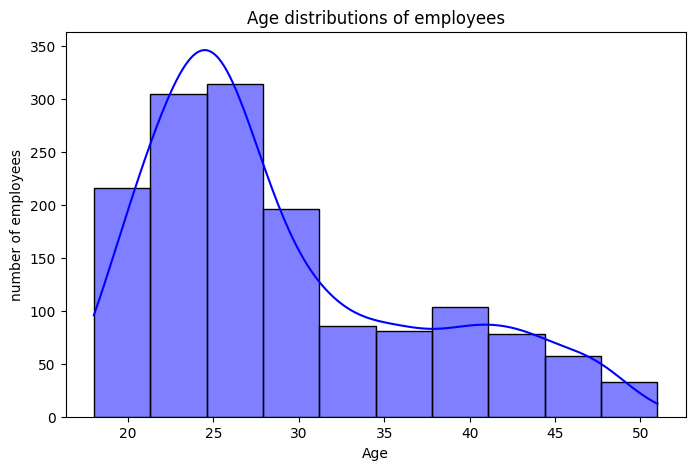

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(Fact_Employee["Age"], bins=10, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("number of employees")
plt.title("Age distributions of employees")
plt.show()

نسبة الاستقالات (Attrition) بين الموظفين

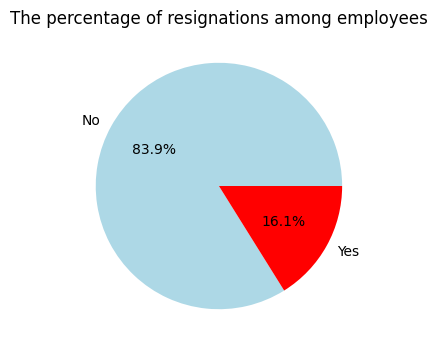

In [16]:
plt.figure(figsize=(6,4))
Fact_Employee["Attrition"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "red"])
plt.ylabel("")
plt.title("The percentage of resignations among employees")
plt.show()

التعرف على مدى رضا الموظفين عن بيئة العمل

<ipython-input-17-3b0c24af11fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Dim_Performance_Rating["EnvironmentSatisfaction"], palette="Blues")


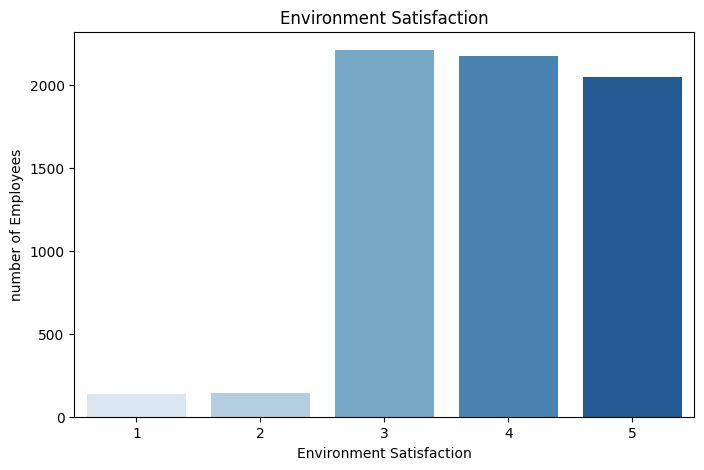

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x=Dim_Performance_Rating["EnvironmentSatisfaction"], palette="Blues")
plt.xlabel("Environment Satisfaction")
plt.ylabel("number of Employees")
plt.title("Environment Satisfaction")
plt.show()


مدى رضا الموظفين عن وظائفهم

<ipython-input-18-5d655b60d598>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Dim_Performance_Rating["JobSatisfaction"], palette="Greens")


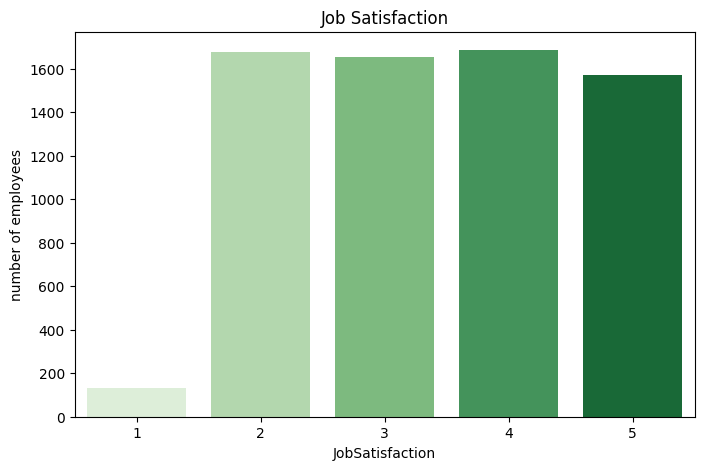

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x=Dim_Performance_Rating["JobSatisfaction"], palette="Greens")
plt.xlabel("JobSatisfaction")
plt.ylabel("number of employees")
plt.title("Job Satisfaction")
plt.show()

تحديد مدى توازن الحياة الشخصية والمهنية للموظفين

<ipython-input-23-462f4c8f8982>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Dim_Performance_Rating["WorkLifeBalance"], palette="Oranges")


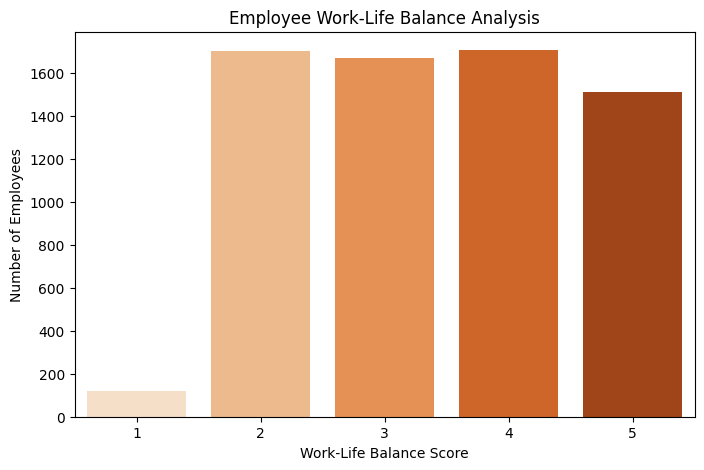

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x=Dim_Performance_Rating["WorkLifeBalance"], palette="Oranges")
plt.xlabel("Work-Life Balance Score")
plt.ylabel("Number of Employees")
plt.title("Employee Work-Life Balance Analysis")
plt.show()

 مقارنة الموظفين الذين يعملون ساعات إضافية مقابل الذين لا يعملون

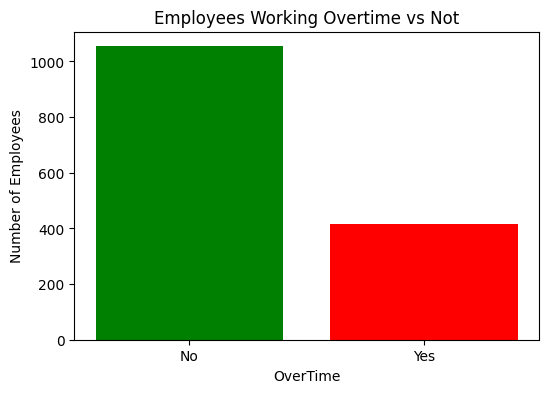

In [28]:
overtime_counts = Fact_Employee["OverTime"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(overtime_counts.index, overtime_counts.values, color=['green', 'red'])
plt.xlabel("OverTime")
plt.ylabel("Number of Employees")
plt.title("Employees Working Overtime vs Not")
plt.show()

معرفة نسبة الذكور مقابل الإناث في الشركة

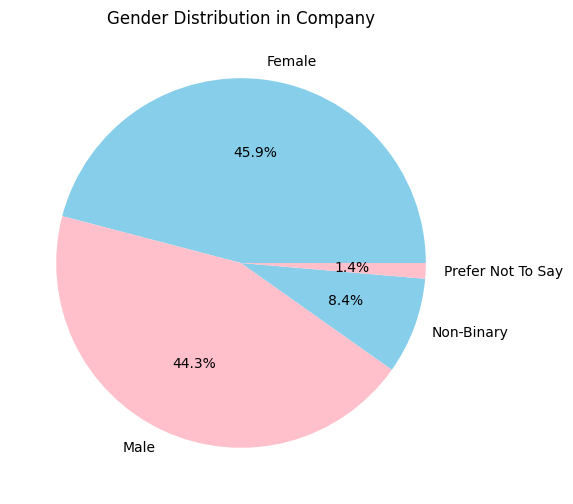

In [29]:
gender_counts = Fact_Employee["Gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title("Gender Distribution in Company")
plt.show()

إنشاء ملف Excel جديد باسم "Cleaned_HR_Data.xlsx"
وتخزين كل DataFrame في Sheet منفصل داخل الملف

In [27]:
with pd.ExcelWriter("Cleaned_HR_Data.xlsx") as writer:
    Fact_Employee.to_excel(writer, sheet_name="Fact_Employee", index=False)
    Dim_Educationa_Level.to_excel(writer, sheet_name="Dim_Educationa_Level", index=False)
    Dim_Rating_Level.to_excel(writer, sheet_name="Dim_Rating_Level", index=False)
    Dim_Performance_Rating.to_excel(writer, sheet_name="Dim_Performance_Rating", index=False)
    Dim_Satisfied_Level.to_excel(writer, sheet_name="Dim_Satisfied_Level", index=False)